In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data=pd.read_csv(r"D:\ICT ML AND AI\intermedaite test\test file.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
data_copy=data

In [4]:
data.shape

(5681, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


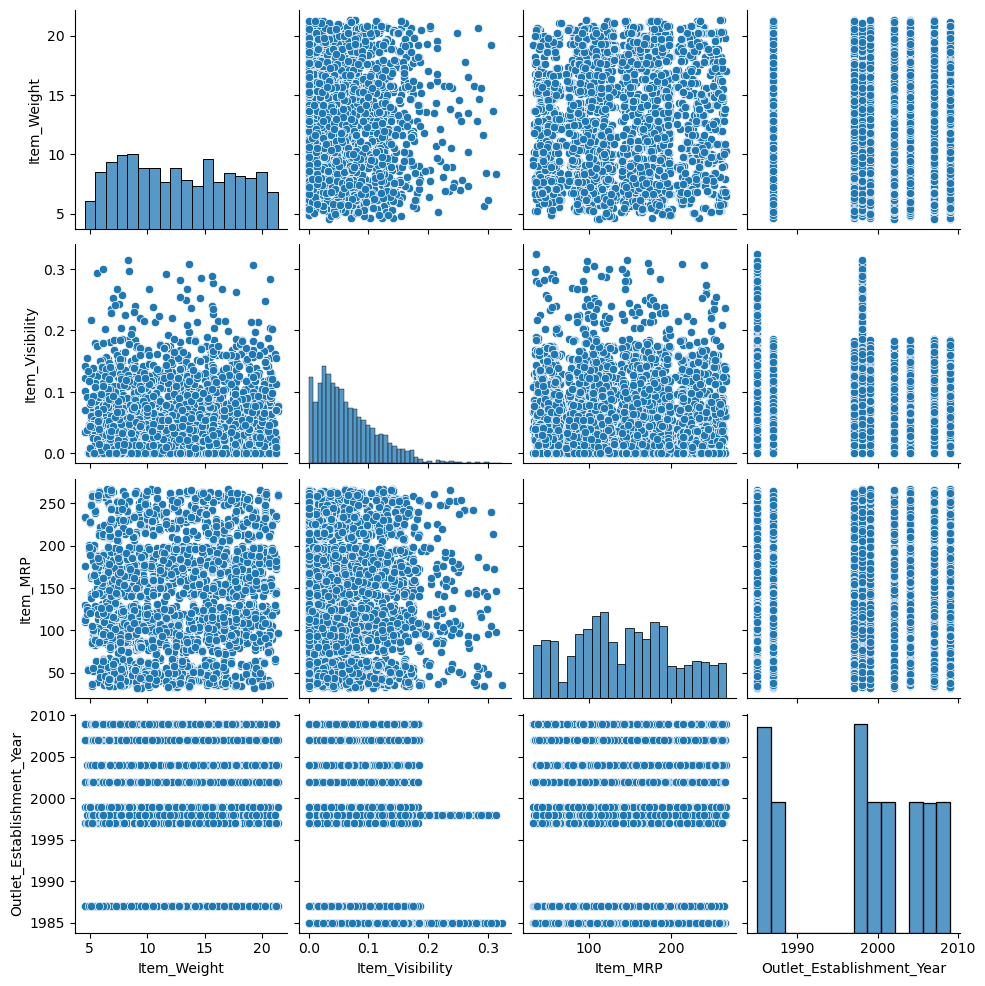

In [7]:
sns.pairplot(data)
plt.show()

In [8]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
data['Item_Identifier'].nunique()

1543

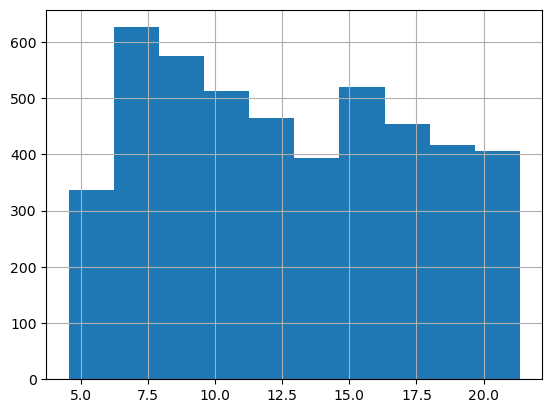

In [11]:
data['Item_Weight'].hist()
plt.show()

In [12]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].median())
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

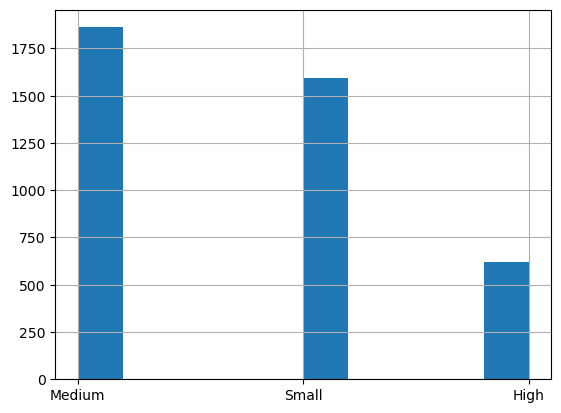

In [13]:
data['Outlet_Size'].hist()
plt.show()

In [14]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [15]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print(data[i].nunique())
    print()

Item_Identifier
['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
1543

Item_Weight
[20.75   8.3   14.6    7.315 12.5    9.8   19.35   6.305  5.985 16.6
  6.59   4.785 16.75   6.135 19.85  17.85  13.6    7.1   19.2   13.65
  6.785 13.     5.825 13.8   12.8    9.5    5.78  10.395 18.35  21.1
 19.75   8.43  15.35   6.71  10.195 11.65  12.85  12.15  18.25   5.98
 12.65  13.1   20.7    7.855 13.35  17.25   8.315 21.35   5.88   7.435
 14.65  14.    18.2   17.6    7.71   7.81  16.35  16.1    5.34   5.51
  6.61   6.38   8.71  17.75   6.44  12.6    7.935 18.5    6.035 11.8
  6.26  16.5   15.7    6.635  8.155  6.175  8.18   8.355  6.905 20.35
 19.25   5.48   5.425 12.1   11.     5.765  5.44   6.13   8.195 14.15
 14.3    5.635  5.73   7.155 15.2   15.25   8.76   9.13  19.6   10.
 11.3    6.57  13.15   4.635 10.6    9.3    7.02   7.825 19.1    7.51
  8.85  17.35  15.15   5.46  13.5    8.275 10.8   15.5    4.905  9.285
  8.97  18.75   8.895  6.89  16.25  13.85  18.     9.21  20.85  20.25
 10.5

In [16]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [17]:
data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [18]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('LF','Low Fat')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('low fat','Low Fat')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('reg','Regular')

In [19]:
data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [20]:
data['Item_Visibility']=data['Item_Visibility']*100

<AxesSubplot:>

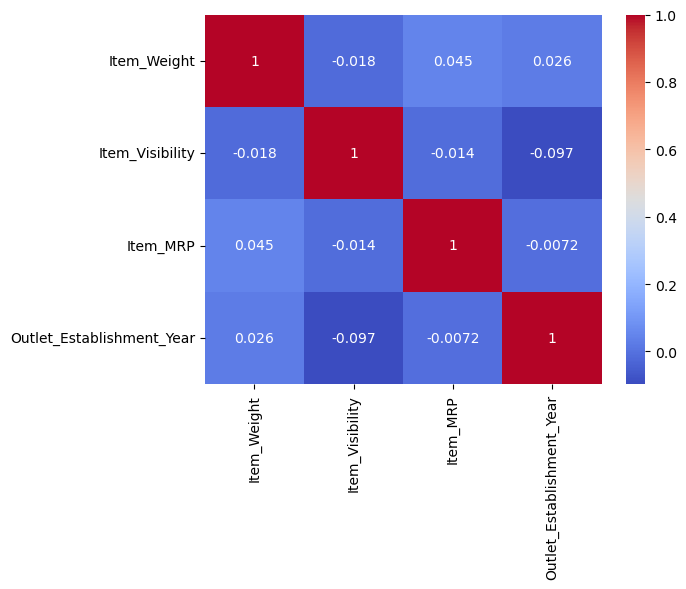

In [21]:
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [22]:
data=data.drop('Outlet_Establishment_Year',axis=1)
data=data.drop('Item_Weight',axis=1)
data.head(3)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,0.756484,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,Regular,3.842768,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1
2,NCN55,Low Fat,9.957491,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store


In [23]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [24]:
data1=data

In [25]:
data['Outlet_Type']=data['Outlet_Type'].map({'Supermarket Type1':1,"Supermarket Type2":2,"Supermarket Type3":3,"Grocery Store":0})
data.head(3)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,0.756484,Snack Foods,107.8622,OUT049,Medium,Tier 1,1
1,FDW14,Regular,3.842768,Dairy,87.3198,OUT017,Medium,Tier 2,1
2,NCN55,Low Fat,9.957491,Others,241.7538,OUT010,Medium,Tier 3,0


In [26]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [27]:
data['Outlet_Location_Type']=data['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})
data.head(3)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,0.756484,Snack Foods,107.8622,OUT049,Medium,1,1
1,FDW14,Regular,3.842768,Dairy,87.3198,OUT017,Medium,2,1
2,NCN55,Low Fat,9.957491,Others,241.7538,OUT010,Medium,3,0


In [28]:
data['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [29]:
data['Outlet_Size']=data['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})
data.head(3)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,0.756484,Snack Foods,107.8622,OUT049,1,1,1
1,FDW14,Regular,3.842768,Dairy,87.3198,OUT017,1,2,1
2,NCN55,Low Fat,9.957491,Others,241.7538,OUT010,1,3,0


In [30]:
data['Item_Fat_Content']=data['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
data.head(3)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,0,0.756484,Snack Foods,107.8622,OUT049,1,1,1
1,FDW14,1,3.842768,Dairy,87.3198,OUT017,1,2,1
2,NCN55,0,9.957491,Others,241.7538,OUT010,1,3,0


In [31]:
##copying data
data1=data

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Item_Identifier']=le.fit_transform(data['Item_Identifier'])

In [33]:
outletidentifier=data['Outlet_Identifier'].unique()
outletidentifier.sort()

In [34]:
outletidentifier

array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)

In [35]:
data['Outlet_Identifier']=data['Outlet_Identifier'].map({'OUT010':0, 'OUT013':1, 'OUT017':2, 'OUT018':3, 'OUT019':4, 'OUT027':5,
       'OUT035':6, 'OUT045':7, 'OUT046':8, 'OUT049':9})
data.head(3)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,0,0.756484,Snack Foods,107.8622,9,1,1,1
1,1067,1,3.842768,Dairy,87.3198,2,1,2,1
2,1406,0,9.957491,Others,241.7538,0,1,3,0


In [36]:
data['Item_Type']=le.fit_transform(data['Item_Type'])

In [37]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,0,0.756484,13,107.8622,9,1,1,1
1,1067,1,3.842768,4,87.3198,2,1,2,1
2,1406,0,9.957491,11,241.7538,0,1,3,0
3,809,0,1.538839,13,155.0340,2,1,2,1
4,1184,1,11.859931,4,234.2300,5,1,3,3


In [38]:
x=data

In [39]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#x_ss=ss.fit_transform(x)
#x_ss=pd.DataFrame(x_ss,columns=x.columns)
x_ss=x

In [40]:
x_ss.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,0,0.756484,13,107.8622,9,1,1,1
1,1067,1,3.842768,4,87.3198,2,1,2,1
2,1406,0,9.957491,11,241.7538,0,1,3,0
3,809,0,1.538839,13,155.0340,2,1,2,1
4,1184,1,11.859931,4,234.2300,5,1,3,3


In [41]:
import pickle
model=pickle.load(open('model.pkl','rb'))
ItemOutletSales=model.predict(x_ss)

In [42]:
ItemOutletSales

array([1673.94017283, 1387.57445086,  623.89354464, ..., 1901.87944315,
       3480.72113112, 1252.96432054])

In [44]:
data_copy

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.756484,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,3.842768,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,9.957491,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,1.538839,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,11.859931,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,1.349647,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,14.299090,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,7.352856,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [45]:
output=pd.DataFrame()
output['Item_Identifier']=data_copy['Item_Identifier']
output['Outlet_Identifier']=data_copy['Outlet_Identifier']
output['Item_Outlet_Sales']=ItemOutletSales

In [46]:
output

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1673.940173
1,FDW14,OUT017,1387.574451
2,NCN55,OUT010,623.893545
3,FDQ58,OUT017,2495.325175
4,FDY38,OUT027,6353.121199
...,...,...,...
5676,FDB58,OUT046,2167.190295
5677,FDD47,OUT018,2554.910333
5678,NCO17,OUT045,1901.879443
5679,FDJ26,OUT017,3480.721131


In [51]:
output.loc[output['Item_Outlet_Sales']<0,'Item_Outlet_Sales']=-output['Item_Outlet_Sales']

In [53]:
output[output['Item_Outlet_Sales']<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [54]:
output.to_csv('Submissionfile.csv',index=False)

In [ ]:
#the score obtained in vidya is 1155.1162165725095.